In [17]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.layers import Dense,Input,Flatten
from tensorflow.keras import Model
import  matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [4]:
(X_train,y_train) , (X_test,y_test) = load_data()

11501568/11490434 [==============================] - 14s 1us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [10]:
def plot_digits(X,y):
    plt.figure(figsize = (20,20))
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(X[i],cmap = 'gray')
        plt.axis('off')
        plt.title(y[i])

    plt.show()
    plt.close()

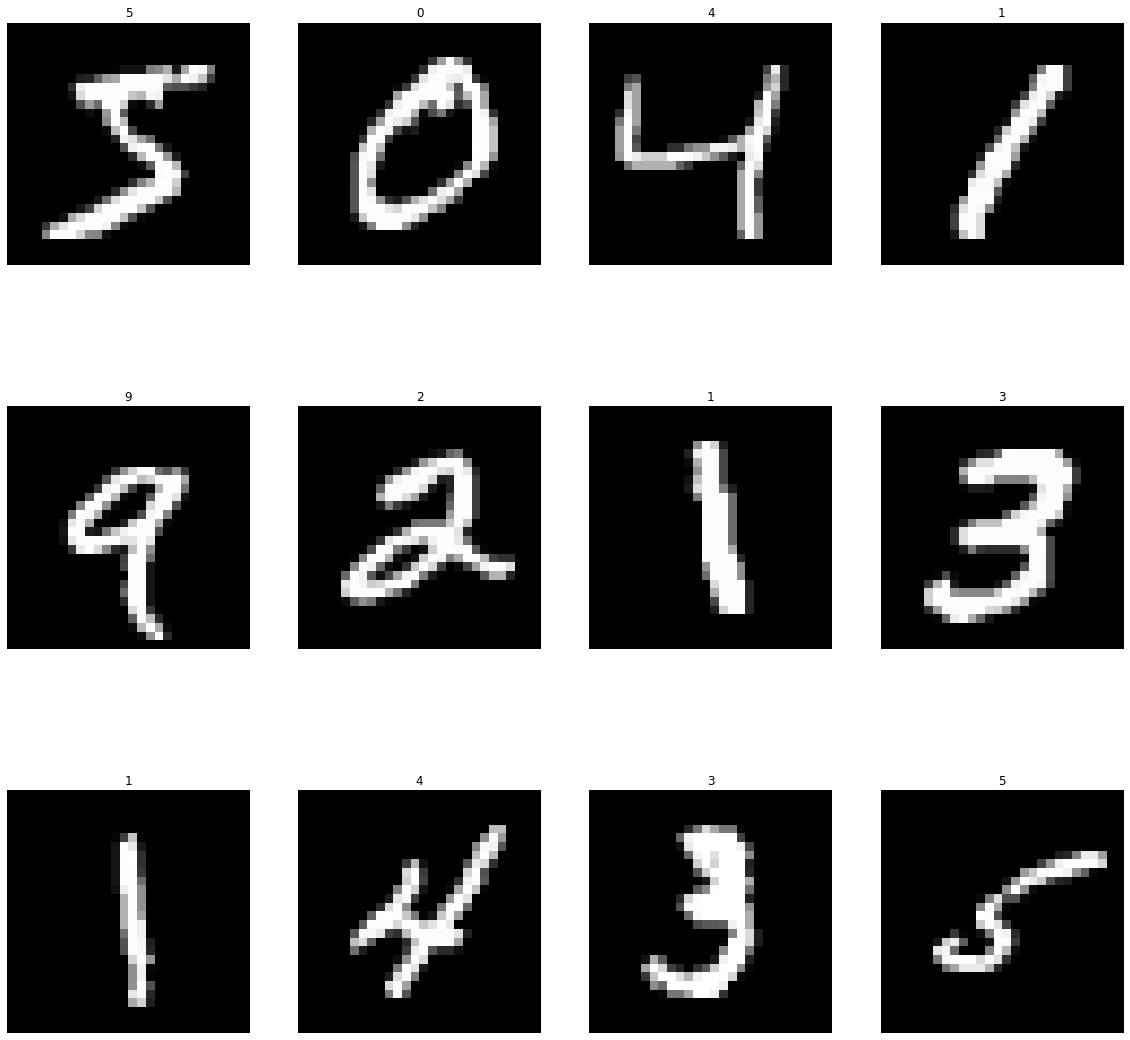

In [11]:
plot_digits(X_train,y_train)

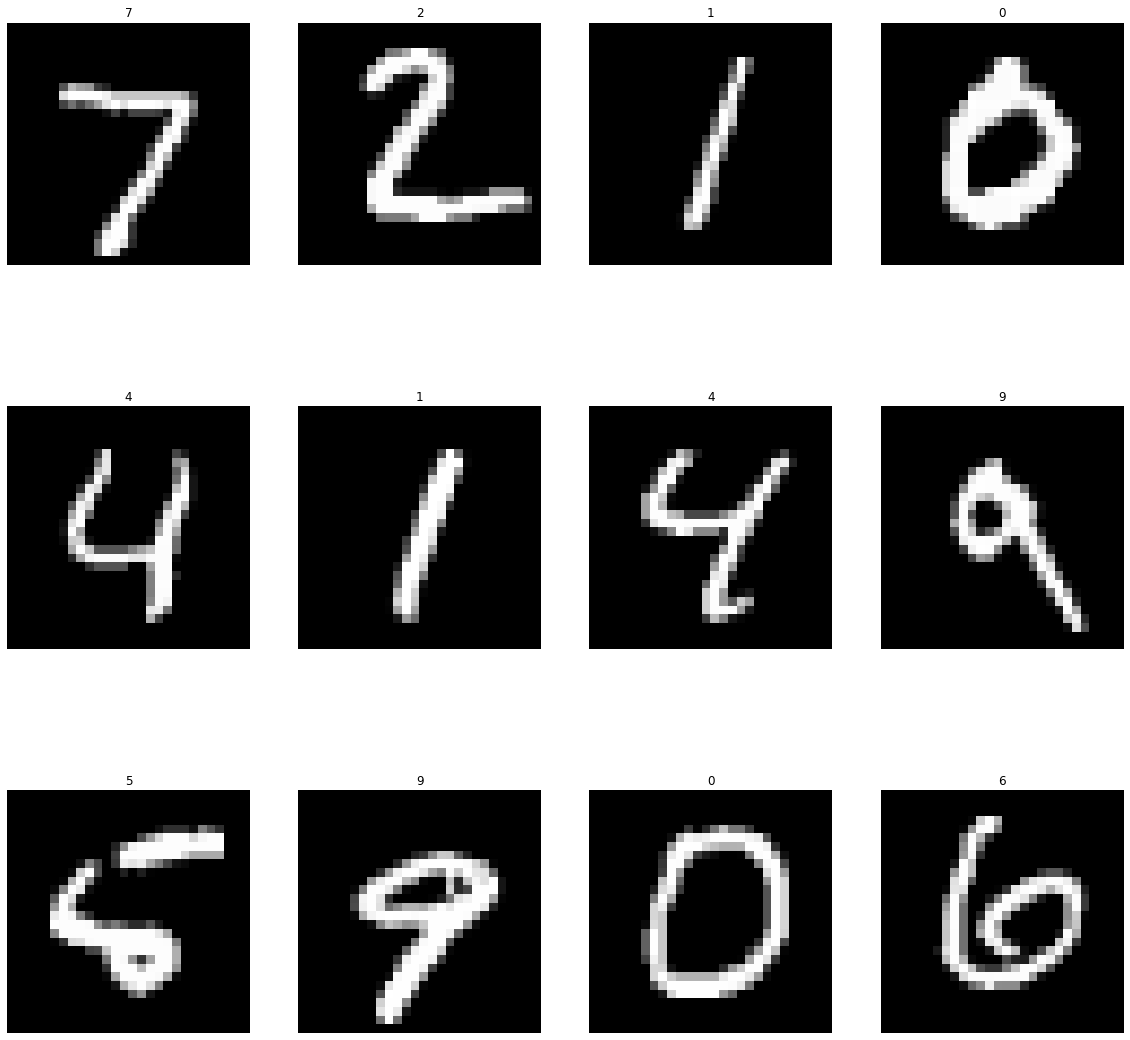

In [12]:
plot_digits(X_test,y_test)

In [34]:
def build_model():
    inputs = Input((28,28))
    h1 = Flatten()(inputs)
    h2 = Dense(16,activation = 'sigmoid')(h1)
    h3 = Dense(8,activation = 'sigmoid')(h2)
    h4 = Dense(4,activation = 'sigmoid')(h3)
    outputs = Dense(10,activation = 'softmax')(h4)
    
    model = Model(inputs,outputs)
    model.summary()
    return model

In [35]:
model = build_model()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 16)                12560     
                                                                 
 dense_18 (Dense)            (None, 8)                 136       
                                                                 
 dense_19 (Dense)            (None, 4)                 36        
                                                                 
 dense_20 (Dense)            (None, 10)                50        
                                                                 
Total params: 12,782
Trainable params: 12,782
Non-trainable

In [18]:
y_train = to_categorical(y_train,10)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [38]:
model.compile(optimizer = 'adam',
           loss = 'mse',
           metrics = ['accuracy'])
model.fit(X_train,y_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0822 - accuracy: 0.3106
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0644 - accuracy: 0.5099
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0524 - accuracy: 0.6342
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0446 - accuracy: 0.6772
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0407 - accuracy: 0.7100
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0371 - accuracy: 0.7517
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0338 - accuracy: 0.7681
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0314 - accuracy: 0.7821
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0309 - accuracy: 0.7885
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.030